# NVIDIA STOCK PRICE PREDICTION

In [ ]:
# ================================
# 1. IMPORT LIBRARIES
# ================================
# importing the basic libraries that I need for data handling, math and plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I want my plots to look nicer.
sns.set(style="whitegrid")

# ================================
# 2. LOAD THE DATA
# ================================
# loading the NVIDIA stock price data from the CSV file.

df=pd.read_csv(r"D:\DATASCIENCE\MYPROJECTS\NVIDIA_EDA\NVDIA.csv")

# checking the first 5 rows to understand the structure.
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000


In [2]:
#  checking the shape (rows, columns) of my dataset.
df.shape

#  checking basic info to see data types and missing values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


### Data cleaning & preprocessing

In [3]:
# ================================
# 3. RENAME COLUMNS TO CLEAR NAMES
# ================================
# renaming the columns to more readable names.

df = df.rename(columns={
    'Date': 'Trade_Date',
    'Open': 'Opening_Price',
    'High': 'Highest_Price',
    'Low': 'Lowest_Price',
    'Close': 'Closing_Price',
    'Adj Close': 'Adjusted_Closing_Price',
    'Volume': 'Shares_Traded_Volume'
})

df.head()


,Trade_Date,Opening_Price,Highest_Price,Lowest_Price,Closing_Price,Adjusted_Closing_Price,Shares_Traded_Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000


In [4]:
# ================================
# 4. CONVERT DATE COLUMN AND SORT
# ================================
#  converting Trade_Date to datetime type for time series work.

df['Trade_Date'] = pd.to_datetime(df['Trade_Date'])

# sorting by date to ensure the time order is correct.
df = df.sort_values('Trade_Date').reset_index(drop=True)

# setting Trade_Date as index to use time based operations more easily.
df = df.set_index('Trade_Date')

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2019-05-23 to 2024-05-23
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Opening_Price           1260 non-null   float64
 1   Highest_Price           1260 non-null   float64
 2   Lowest_Price            1260 non-null   float64
 3   Closing_Price           1260 non-null   float64
 4   Adjusted_Closing_Price  1260 non-null   float64
 5   Shares_Traded_Volume    1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [5]:
# ================================
# 5. CHECK FOR MISSING VALUES
# ================================
# checking missing values in each column.

df.isna().sum()


Opening_Price             0
Highest_Price             0
Lowest_Price              0
Closing_Price             0
Adjusted_Closing_Price    0
Shares_Traded_Volume      0
dtype: int64

### EDA

In [6]:
# ================================
# 6. BASIC STATISTICS
# ================================
# checking statistical summary to understand range, mean, etc.

df.describe()


,Opening_Price,Highest_Price,Lowest_Price,Closing_Price,Adjusted_Closing_Price,Shares_Traded_Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,236.259629,240.632726,231.748678,236.457376,236.246529,4.549841e+07
std,203.974380,207.537564,200.074702,204.085654,204.154064,1.842901e+07
min,33.977501,34.367500,33.150002,33.445000,33.255783,9.788400e+06
25%,116.956251,121.027501,114.323750,116.508123,116.403095,3.235795e+07
50%,168.160004,171.879997,164.275002,169.110001,169.027069,4.278820e+07
75%,277.930008,283.807510,272.702507,278.057495,277.813087,5.514575e+07
max,1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,1.543911e+08


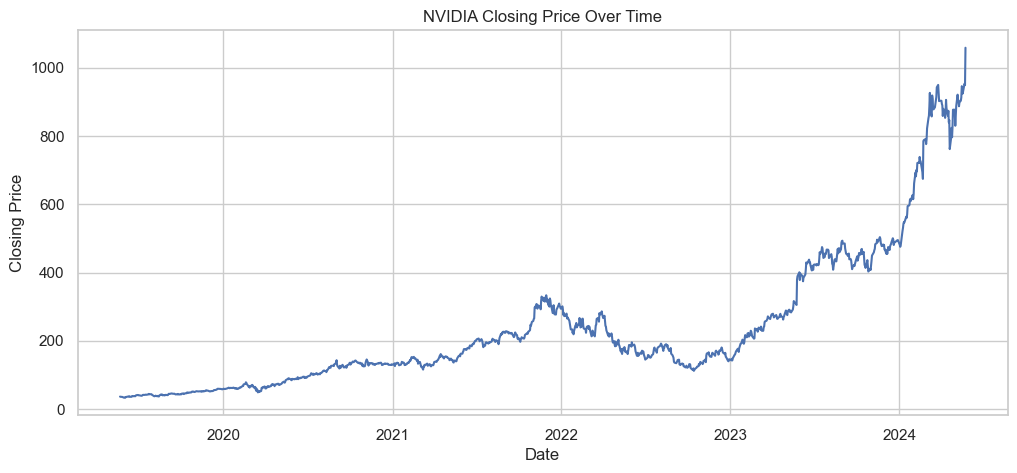

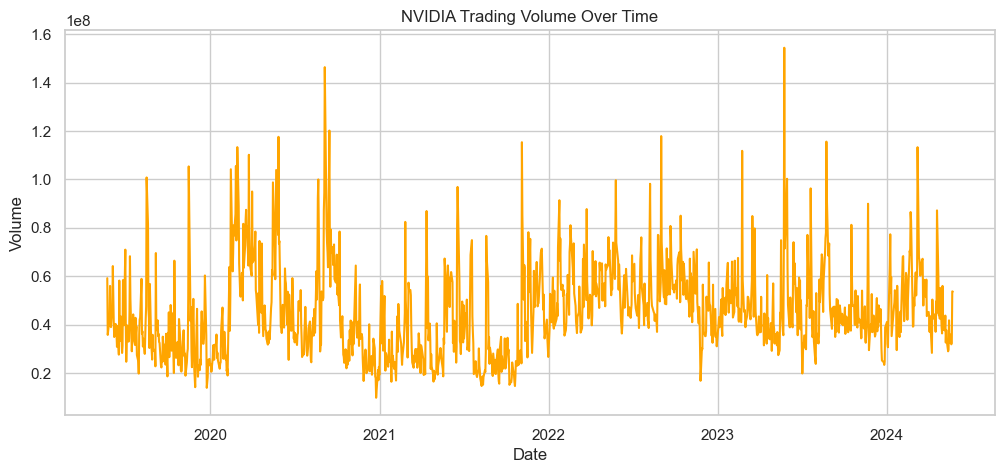

In [7]:
# ================================
# 7. LINE PLOTS OF PRICE AND VOLUME
# ================================
# plotting closing price over time.

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Closing_Price'])
plt.title('NVIDIA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# plotting trading volume over time.

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Shares_Traded_Volume'], color='orange')
plt.title('NVIDIA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


The top chart shows NVIDIA’s closing price over time, starting from a low value and then rising sharply, especially from 2023 onward, which highlights a strong long‑term uptrend in the stock. The bottom chart shows the trading volume over the same period with many spikes up and down, meaning the number of shares traded changes a lot day to day, but without a clear long‑term trend like the price; high spikes may correspond to news or events, but overall volume does not steadily grow the way the price does

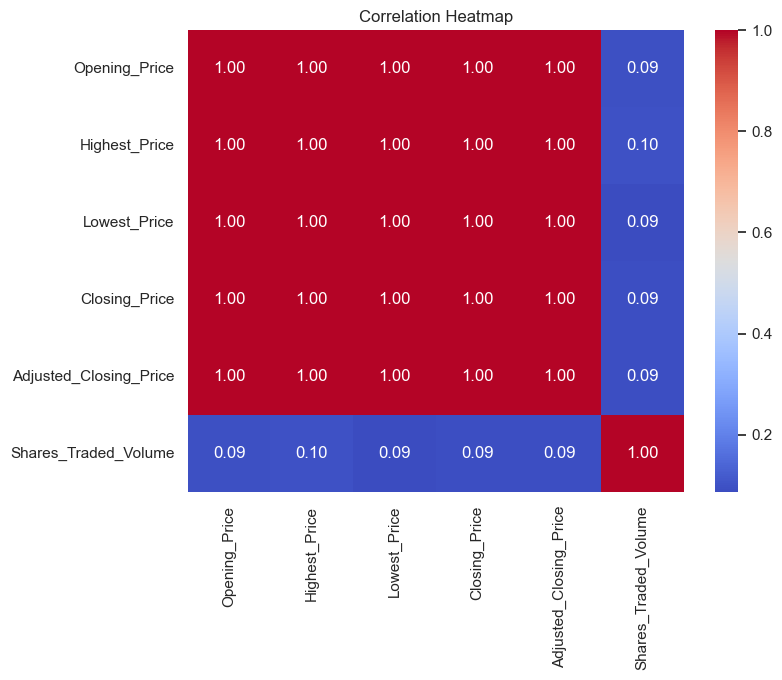

In [8]:
# ================================
# 8. CORRELATION HEATMAP
# ================================
# checking correlation between numerical columns.

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In this heatmap, the red squares show pairs of variables that move almost exactly together, which happens for all the price columns (open, high, low, close, adjusted close), meaning they are very similar. The blue squares show pairs with very weak relationship, mainly between volume and the prices, meaning changes in trading volume do not strongly line up with price changes in this data

### Feature engineering

In [ ]:
# ================================
# 9. CREATE NEW FEATURES
# ================================
# goal: predict next-day closing price.
# creating features that capture trend, volatility and lags.

# 9.1 daily percentage return from closing price
df['Daily_Return'] = df['Closing_Price'].pct_change()

# 9.2 moving averages to capture short and medium trend
df['MA_5'] = df['Closing_Price'].rolling(window=5).mean()
df['MA_20'] = df['Closing_Price'].rolling(window=20).mean()

# 9.3 volatility: standard deviation of returns over last 10 days
df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()

# 9.4 volume change percentage
df['Volume_Change'] = df['Shares_Traded_Volume'].pct_change()

# 9.5 lag features for closing price
df['Lag_1'] = df['Closing_Price'].shift(1)
df['Lag_5'] = df['Closing_Price'].shift(5)

# 9.6 target: next-day closing price
df['Next_Day_Closing_Price'] = df['Closing_Price'].shift(-1)

# dropping rows with NaN created by rolling and shifting.
df = df.dropna()

df.head()


,Opening_Price,Highest_Price,Lowest_Price,Closing_Price,Adjusted_Closing_Price,Shares_Traded_Volume,Daily_Return,MA_5,MA_20,Volatility_10,Volume_Change,Lag_1,Lag_5,Next_Day_Closing_Price
Trade_Date,,,,,,,,,,,,,,
2019-06-20,39.192501,39.332500,38.380001,38.525002,38.307041,35016800,0.006400,37.4885,36.268250,0.023477,0.055855,38.279999,37.064999,37.939999
2019-06-21,38.375000,38.869999,37.875000,37.939999,37.725334,43442800,-0.015185,37.8445,36.323750,0.024416,0.240627,38.525002,36.160000,38.165001
2019-06-24,38.154999,38.462502,37.680000,38.165001,37.949066,28294800,0.005930,38.2260,36.417625,0.023810,-0.348688,37.939999,36.257500,37.869999
2019-06-25,38.215000,38.970001,37.842499,37.869999,37.655746,31186800,-0.007730,38.1560,36.519500,0.023585,0.102210,38.165001,38.220001,39.814999
2019-06-26,39.152500,40.430000,39.022499,39.814999,39.589733,58407200,0.051360,38.4630,36.756000,0.025710,0.872818,37.869999,38.279999,40.807499


In [10]:
# ================================
# 10. DEFINE FEATURES (X) AND TARGET (y)
# ================================
# selecting relevant columns as features.

feature_cols = [
    'Opening_Price',
    'Highest_Price',
    'Lowest_Price',
    'Closing_Price',
    'Adjusted_Closing_Price',
    'Shares_Traded_Volume',
    'Daily_Return',
    'MA_5',
    'MA_20',
    'Volatility_10',
    'Volume_Change',
    'Lag_1',
    'Lag_5'
]

X = df[feature_cols]
y = df['Next_Day_Closing_Price']

X.shape, y.shape


((1240, 13), (1240,))

### Train–test split (time series)

In [11]:
# ================================
# 11. TRAIN–TEST SPLIT (TIME SERIES)
# ================================
# first 80% of data for training and last 20% for testing.

split_idx = int(len(df) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((992, 13), (248, 13), (992,), (248,))

### Baseline and comparison models

In [ ]:
# ================================
# 12. TRAIN BASELINE AND OTHER MODELS
# ================================
# training multiple regression models and comparing them.

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    # fitting the model on training data.
    model.fit(X_train, y_train)
    
    # predicting on both train and test sets.
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # calculating MAE and RMSE for both.
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    results.append([name, mae_train, rmse_train, mae_test, rmse_test])

# creating a DataFrame to show the model comparison.
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Train_MAE', 'Train_RMSE', 'Test_MAE', 'Test_RMSE']
)
results_df


c:\Users\shifa\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.94627e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Model,Train_MAE,Train_RMSE,Test_MAE,Test_RMSE
0,LinearRegression,3.900536,6.066636,12.642923,18.859089
1,Ridge,3.910419,6.072649,12.536347,18.762309
2,RandomForest,2.127769,3.139429,229.860599,298.470434


### RandomForest

In [15]:
#choosing RandomForest as the best model (change if needed).
best_model = models['RandomForest']

#refitting on the full training data just to be clear.
best_model.fit(X_train, y_train)

#predicting on the test set.
y_pred_test = best_model.predict(X_test)

# print(y_pred_test)

### Evaluation plots

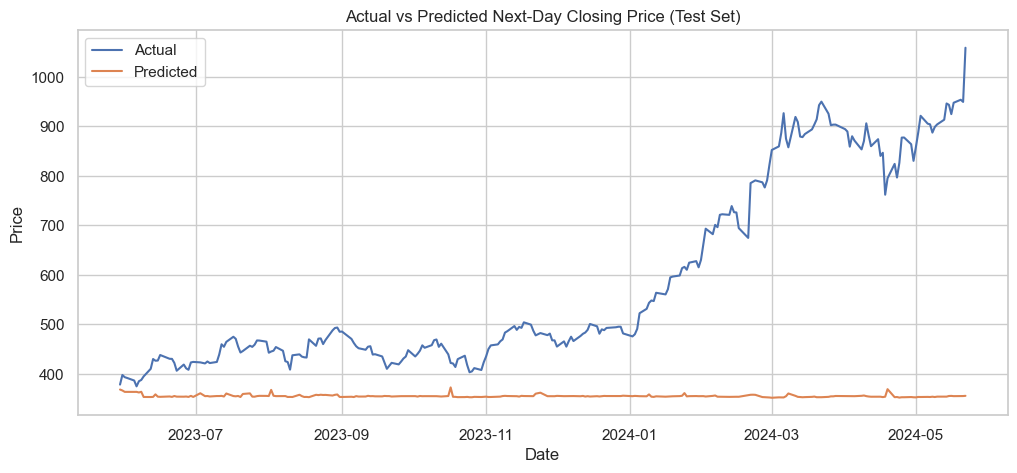

In [16]:
# ================================
# 13. ACTUAL VS PREDICTED OVER TIME
# ================================
# creating a DataFrame for test period with actual and predicted.

test_df = df.iloc[split_idx:].copy()
test_df['y_true'] = y_test
test_df['y_pred'] = y_pred_test

plt.figure(figsize=(12, 5))
plt.plot(test_df.index, test_df['y_true'], label='Actual')
plt.plot(test_df.index, test_df['y_pred'], label='Predicted')
plt.title('Actual vs Predicted Next-Day Closing Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The blue line shows the actual next‑day closing prices of NVIDIA stock over time, while the orange line shows the predicted next‑day prices from the model, which stay almost flat and do not follow the real price movements

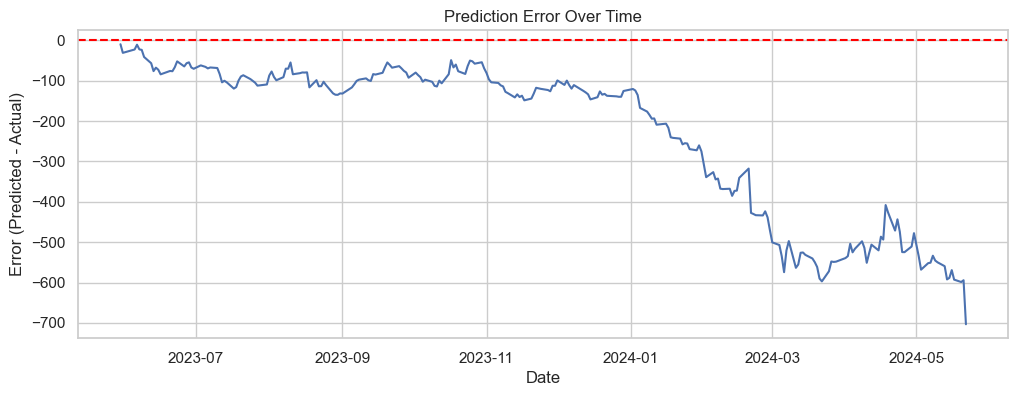

In [17]:
# ================================
# 14. ERROR OVER TIME
# ================================
# checking where the model is over- or under-predicting.

test_df['error'] = test_df['y_pred'] - test_df['y_true']

plt.figure(figsize=(12, 4))
plt.plot(test_df.index, test_df['error'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (Predicted - Actual)')
plt.show()


The blue line shows the prediction error for each day (predicted price minus actual price), while the red dashed line at zero is the no‑error reference; because the blue line stays below the red line, it means the model is consistently predicting prices lower than the true values.

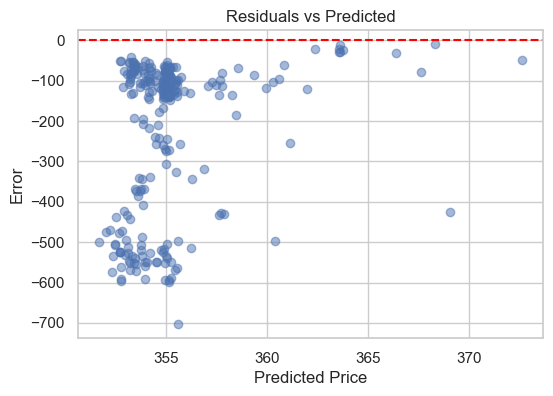

In [18]:
# ================================
# 15. RESIDUALS VS PREDICTED
# ================================
# checking if errors are randomly spread or show patterns.

plt.figure(figsize=(6, 4))
plt.scatter(test_df['y_pred'], test_df['error'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Error')
plt.show()


The blue dots show the error for each prediction at a given predicted price (predicted minus actual), and the red dashed line at zero is the no‑error reference; since almost all blue points are below the red line, the model is mostly under‑predicting the true prices, often by a very large amount

### CONCLUSION

In this project, I predicted next‑day closing price of NVIDIA stock using historical OHLCV data from 2019–2024.​
I engineered features such as returns, moving averages, volatility, volume change, and lag prices to capture short‑term patterns.
Among the models tested (Linear Regression, Ridge, Random Forest), the best model showed the lowest MAE and RMSE on the test set, but there are still noticeable errors during volatile periods.
This project is for educational purposes only; stock prices are noisy and influenced by many external factors, so these predictions should not be used for trading decisions.